### Question 1: Apply simple thresholding on any suitable input image

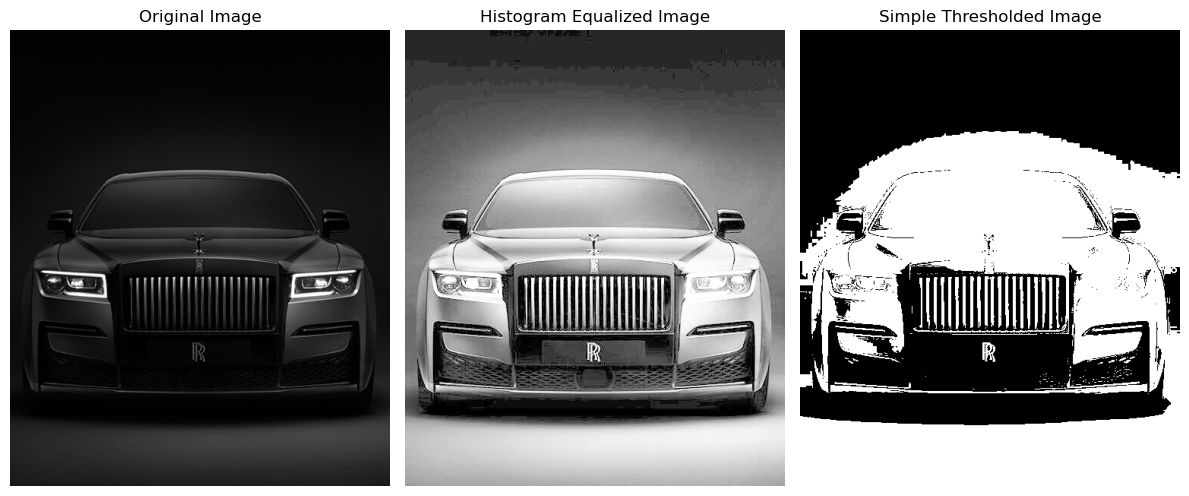

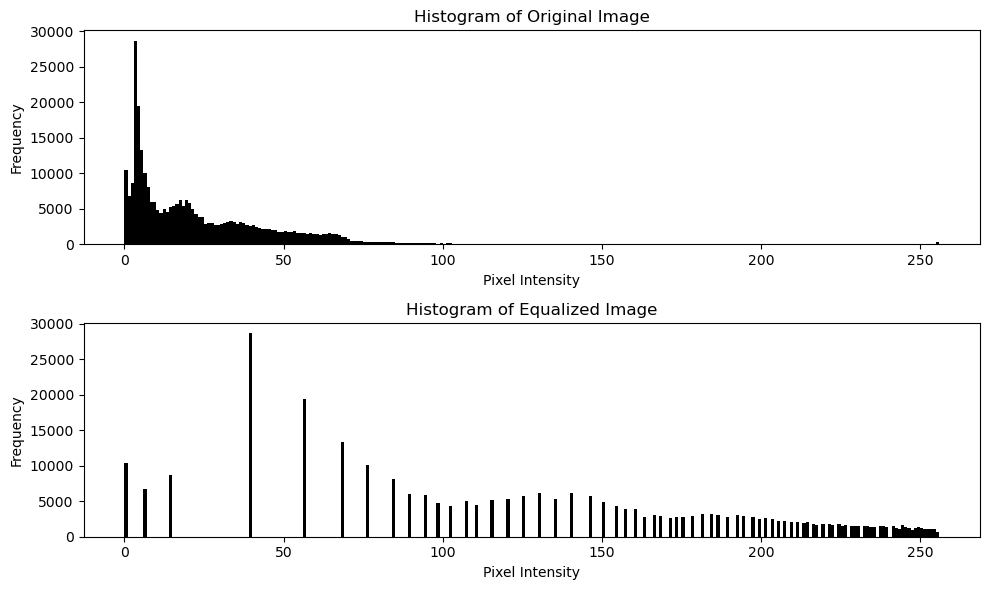

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'rolls royce.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(image)

threshold_value = 128 
_, simple_thresh_image = cv2.threshold(equalized_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Simple Thresholded Image')
plt.imshow(simple_thresh_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title('Histogram of Original Image')
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Question 2: Demonstrate different thresholding methods in which manual and automatic thresholding values can be used

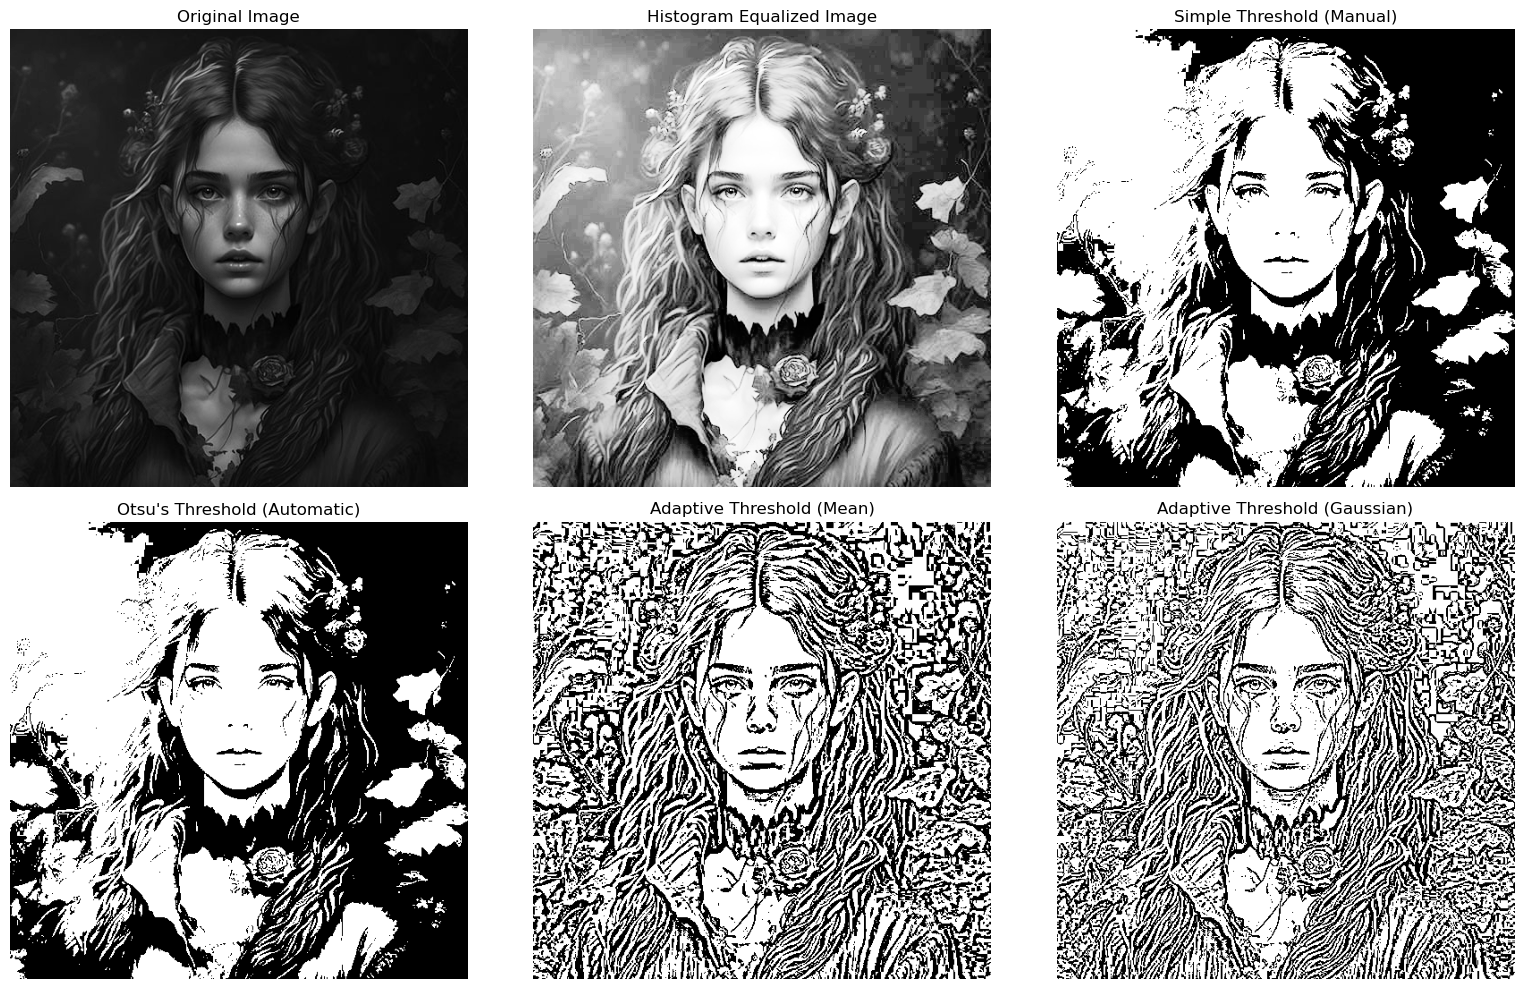

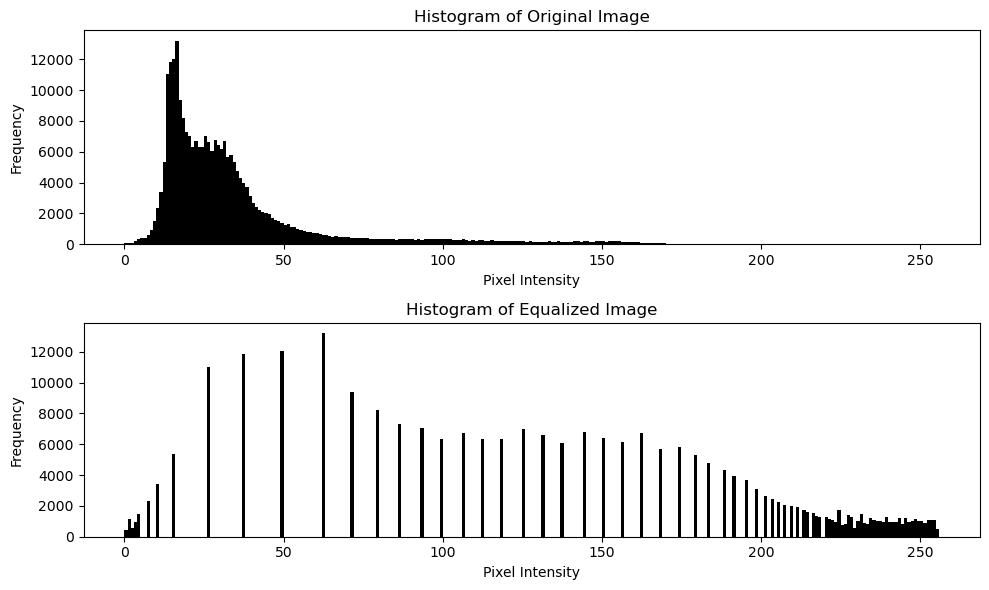

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image from the local system (replace 'path_to_image' with the actual path of your image)
image_path = 'dark-aesthetic.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply histogram equalization to improve contrast
equalized_image = cv2.equalizeHist(image)

# Step 3: Apply Different Thresholding Methods

# 1. Simple Thresholding (Manual)
manual_thresh_value = 128  # Manually setting the threshold value
_, simple_thresh = cv2.threshold(equalized_image, manual_thresh_value, 255, cv2.THRESH_BINARY)

# 2. Otsu's Thresholding (Automatic - Finds the optimal threshold value)
_, otsu_thresh = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Adaptive Thresholding (Mean and Gaussian)
adaptive_thresh_mean = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

adaptive_thresh_gaussian = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Step 4: Display the original, equalized, and thresholded images
plt.figure(figsize=(16, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Histogram Equalized Image
plt.subplot(2, 3, 2)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

# Simple Thresholded Image
plt.subplot(2, 3, 3)
plt.title('Simple Threshold (Manual)')
plt.imshow(simple_thresh, cmap='gray')
plt.axis('off')

# Otsu's Thresholded Image
plt.subplot(2, 3, 4)
plt.title("Otsu's Threshold (Automatic)")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

# Adaptive Threshold (Mean)
plt.subplot(2, 3, 5)
plt.title('Adaptive Threshold (Mean)')
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.axis('off')

# Adaptive Threshold (Gaussian)
plt.subplot(2, 3, 6)
plt.title('Adaptive Threshold (Gaussian)')
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Display histograms (Optional, but useful for comparison)
plt.figure(figsize=(10, 6))

# Histogram of Original Image
plt.subplot(2, 1, 1)
plt.title('Histogram of Original Image')
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram of Equalized Image
plt.subplot(2, 1, 2)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Otsu's Thresholding (Global Thresholding for Bimodal Images):

#### Example Use Case:

License Plate Recognition: When a number plate has consistent lighting, Otsu’s method can effectively binarize the image, separating the text from the background. 

### Adaptive Thresholding (Local Thresholding for Uneven Lighting Conditions):

#### Example Use Case:
Medical Imaging: In X-ray or MRI images, where lighting conditions vary across the image, adaptive thresholding helps in enhancing the contrast locally, making it easier to identify regions of interest.


### Question 3: Demonstrate with suitable applications where adaptive and Otsu's method of thresholding is useful.

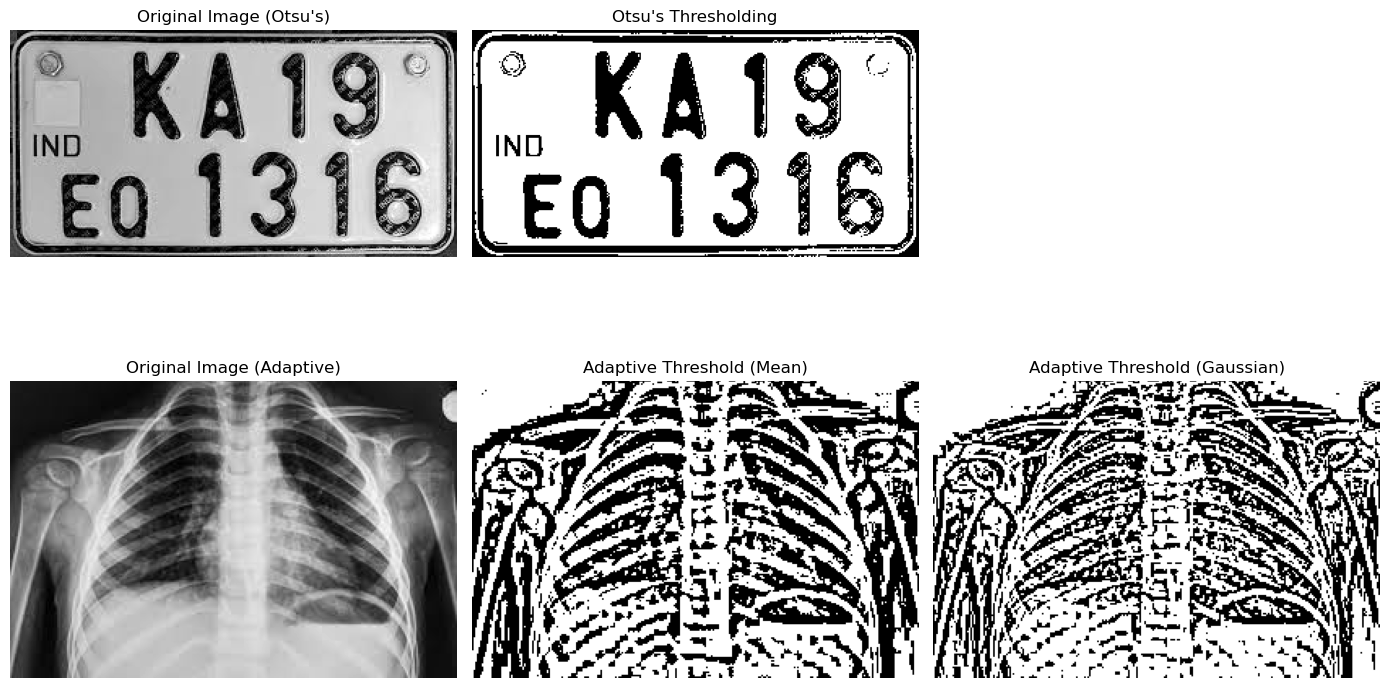

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_otsu_path = 'license plate.jpeg'  # Example of a license plate or document
# For Adaptive Thresholding example (uneven lighting)
image_adaptive_path = 'x-ray.jpeg'  # Example of uneven lighting or text in natural scenes

# Load both images in grayscale
image_otsu = cv2.imread(image_otsu_path, cv2.IMREAD_GRAYSCALE)
image_adaptive = cv2.imread(image_adaptive_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Otsu's Thresholding (useful when bimodal histogram)
_, otsu_thresh = cv2.threshold(image_otsu, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Apply Adaptive Thresholding (useful for uneven lighting)
adaptive_thresh_mean = cv2.adaptiveThreshold(image_adaptive, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image_adaptive, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)

# Step 4: Display the original and thresholded images
plt.figure(figsize=(14, 8))

# Original Image for Otsu's Thresholding
plt.subplot(2, 3, 1)
plt.title("Original Image (Otsu's)")
plt.imshow(image_otsu, cmap='gray')
plt.axis('off')

# Otsu's Thresholded Image
plt.subplot(2, 3, 2)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

# Original Image for Adaptive Thresholding
plt.subplot(2, 3, 4)
plt.title("Original Image (Adaptive)")
plt.imshow(image_adaptive, cmap='gray')
plt.axis('off')

# Adaptive Threshold (Mean)
plt.subplot(2, 3, 5)
plt.title('Adaptive Threshold (Mean)')
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.axis('off')

# Adaptive Threshold (Gaussian)
plt.subplot(2, 3, 6)
plt.title('Adaptive Threshold (Gaussian)')
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
